# auto feature nyc taxi

## 1. Load Datasets

In [1]:
import pandas as pd
from utils import Timer
from pathlib import Path

import os, sys
pathlib = str(Path(os.path.abspath('')).parent.parent.parent.parent.resolve())
sys.path.append(pathlib)
print(pathlib)

train_data = pd.read_parquet(f"{pathlib}/tests/data/test_nyc_taxi_fare.parquet")
print("original input is ")
display(train_data)
train_data.dtypes


/home/vmagent/app/recdp
original input is 


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
9995,16.9,2010-01-30 22:03:12 UTC,-73.994594,40.732393,-73.974557,40.788259,1
9996,5.5,2014-01-23 18:40:00 UTC,-74.001017,40.746352,-73.990873,40.739497,1
9997,4.5,2011-05-05 19:34:01 UTC,-74.005530,40.720826,-73.996565,40.716309,1
9998,8.0,2013-08-04 11:36:36 UTC,-74.001850,40.745591,-74.006125,40.723338,1


fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

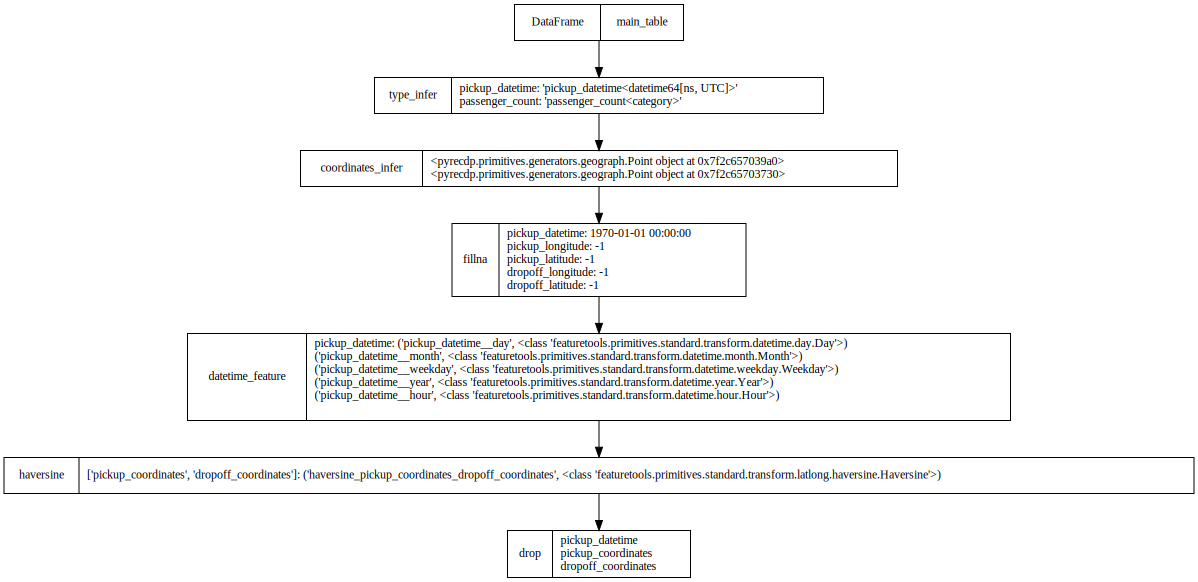

In [2]:
from pyrecdp.autofe import FeatureWrangler

pipeline = FeatureWrangler(dataset=train_data, label="fare_amount")
pipeline.plot()

In [3]:
transformed_data = pipeline.fit_transform('pandas')

execute DataFrame started ...
execute DataFrame took 1.2753065675497055e-05 sec
execute type_infer started ...
execute type_infer took 2.061534833163023 sec
execute coordinates_infer started ...
execute coordinates_infer took 0.08093438390642405 sec
execute fillna started ...
execute fillna took 0.0027219681069254875 sec
execute datetime_feature started ...
execute datetime_feature took 0.006982212886214256 sec
execute haversine started ...
execute haversine took 0.00481798080727458 sec
execute drop started ...
execute drop took 0.0007543968968093395 sec


In [4]:
display(transformed_data)
transformed_data.dtypes

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_datetime__day,pickup_datetime__month,pickup_datetime__weekday,pickup_datetime__year,pickup_datetime__hour,haversine_pickup_coordinates_dropoff_coordinates
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,6,0,2009,17,0.640488
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,1,1,2010,16,5.250677
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,8,3,2011,0,0.863412
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,5,2012,4,1.739388
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,3,1,2010,7,1.242220
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,16.9,-73.994594,40.732393,-73.974557,40.788259,1,30,1,5,2010,22,3.999877
9996,5.5,-74.001017,40.746352,-73.990873,40.739497,1,23,1,3,2014,18,0.711558
9997,4.5,-74.005530,40.720826,-73.996565,40.716309,1,5,5,3,2011,19,0.563746
9998,8.0,-74.001850,40.745591,-74.006125,40.723338,1,4,8,6,2013,11,1.553741


fare_amount                                          float64
pickup_longitude                                     float64
pickup_latitude                                      float64
dropoff_longitude                                    float64
dropoff_latitude                                     float64
passenger_count                                     category
pickup_datetime__day                                   int64
pickup_datetime__month                                 int64
pickup_datetime__weekday                               int64
pickup_datetime__year                                  int64
pickup_datetime__hour                                  int64
haversine_pickup_coordinates_dropoff_coordinates     float64
dtype: object

In [5]:
pipeline.export()

{0: {'children': None, 'op': 'DataFrame', 'config': 'main_table'}, 1: {'children': [0], 'op': 'type_infer', 'config': {'pickup_datetime': 'pickup_datetime<datetime64[ns, UTC]>', 'passenger_count': 'passenger_count<category>'}}, 2: {'children': [1], 'op': 'coordinates_infer', 'config': [<pyrecdp.primitives.generators.geograph.Point object at 0x7f2c657039a0>, <pyrecdp.primitives.generators.geograph.Point object at 0x7f2c65703730>]}, 3: {'children': [2], 'op': 'fillna', 'config': {'pickup_datetime': Timestamp('1970-01-01 00:00:00'), 'pickup_longitude': -1, 'pickup_latitude': -1, 'dropoff_longitude': -1, 'dropoff_latitude': -1}}, 4: {'children': [3], 'op': 'datetime_feature', 'config': {'pickup_datetime': [('pickup_datetime__day', <class 'featuretools.primitives.standard.transform.datetime.day.Day'>), ('pickup_datetime__month', <class 'featuretools.primitives.standard.transform.datetime.month.Month'>), ('pickup_datetime__weekday', <class 'featuretools.primitives.standard.transform.datetime